In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [29]:
file = pd.read_csv('customer_booking.csv', encoding="ISO-8859-1")
file.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [30]:
# file['flight_day'].unique()
# mapping = {'Mon':1, 'Tue':2,'Wed':3,'Thu':4,'Fri':5,'Sat':6,'Sun':7}
# file['flight_day']= file['flight_day'].map(mapping)

In [31]:
file.shape

(50000, 14)

In [32]:
file.isnull().sum().sum()

0

In [34]:
for col in file.select_dtypes('object'):
    file[col],_ = file[col].factorize()
file.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,0,262,19,7,0,0,0,1,0,0,5.52,0
1,1,0,0,112,20,3,0,0,0,0,0,0,5.52,0
2,2,0,0,243,22,17,1,0,1,1,1,0,5.52,0
3,1,0,0,96,31,4,0,0,0,0,0,1,5.52,0
4,2,0,0,68,22,15,1,0,1,1,0,1,5.52,0


In [54]:
file.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,0.112360,0.017800,84.940480,23.04456,9.06634,3.039500,350.269380,20.004220,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,0.315812,0.181559,90.451378,33.88767,5.41266,1.941385,202.830559,16.711689,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,0.000000,0.000000,21.000000,5.00000,5.00000,1.000000,184.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,0.000000,0.000000,51.000000,17.00000,9.00000,3.000000,341.000000,10.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,0.000000,0.000000,115.000000,28.00000,13.00000,5.000000,541.000000,36.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,1.000000,2.000000,867.000000,778.00000,23.00000,6.000000,798.000000,103.000000,1.000000,1.000000,1.000000,9.500000,1.000000


Feature Selection

Analysing Feature selection by different methods i.e Pearson Correlation, and Mutual_info_classif from Sklearn's Feature selection module and at last, training on all the features to see which one is giving best accuracy. 

Pearson Correlation

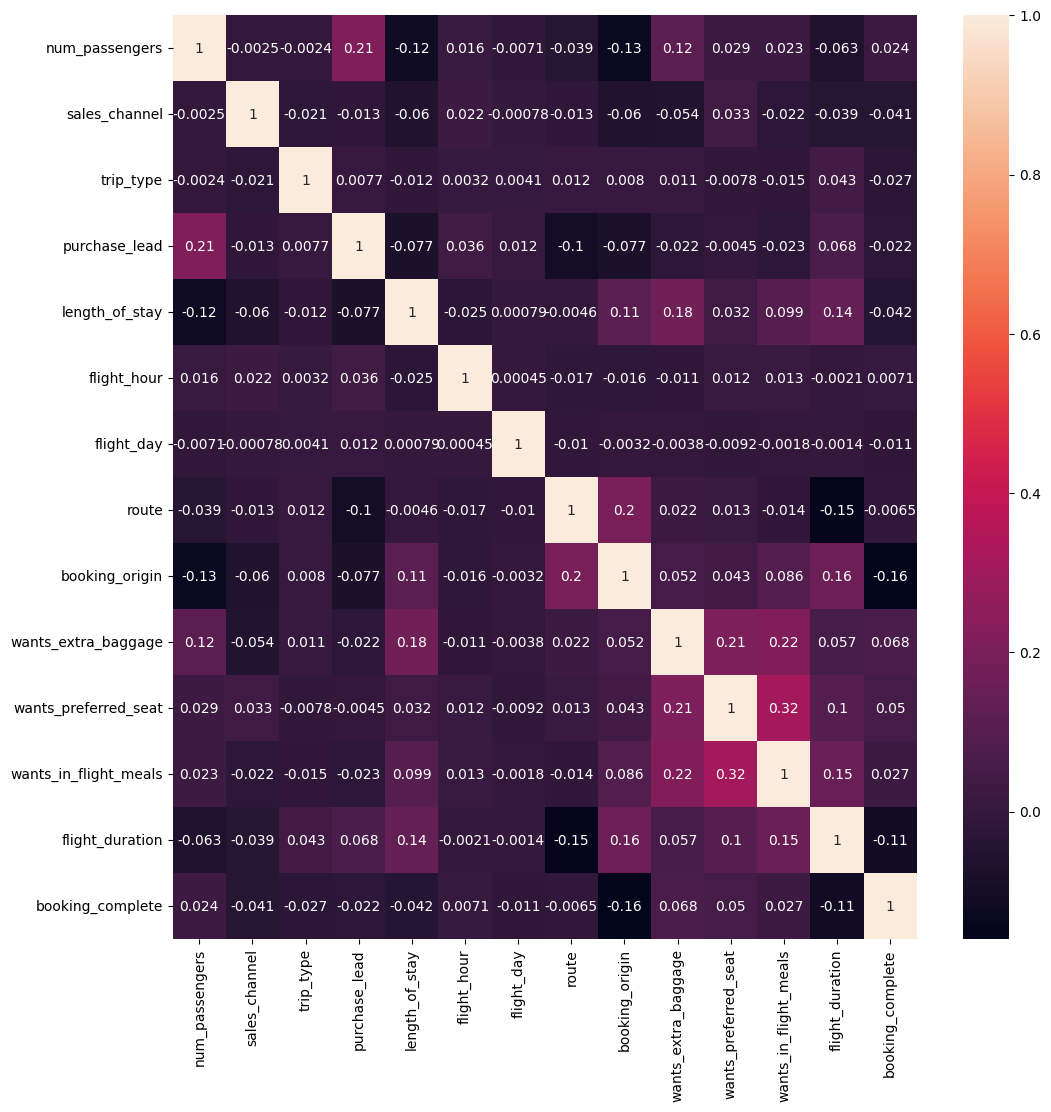

In [35]:
cor = file.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor,annot= True)
plt.savefig('./Results/heatmap.png')

In [36]:
#selecting features which have corrleation more than 0.0
x = file[['num_passengers','flight_hour','wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals']]
y = file['booking_complete']

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2, shuffle = True, random_state = 42)
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc.fit(xtrain,ytrain)
y_pred= rc.predict(xtest)
from sklearn.metrics import accuracy_score
print("Accuracy",(accuracy_score(y_pred, ytest))*100,"%")

Accuracy 84.83000000000001 %


Sklearn feature Selection Module

In [38]:
from sklearn.feature_selection import mutual_info_classif
x= file.drop(columns = ['booking_complete'])
y = file['booking_complete']
score = mutual_info_classif(x,y)
info = pd.Series(score)
info.index = x.columns
info.sort_values(ascending= False)

route                    0.052024
booking_origin           0.045870
flight_duration          0.019325
length_of_stay           0.010039
wants_extra_baggage      0.004689
wants_preferred_seat     0.003888
wants_in_flight_meals    0.003009
num_passengers           0.001801
flight_hour              0.001684
flight_day               0.000972
trip_type                0.000954
purchase_lead            0.000499
sales_channel            0.000334
dtype: float64

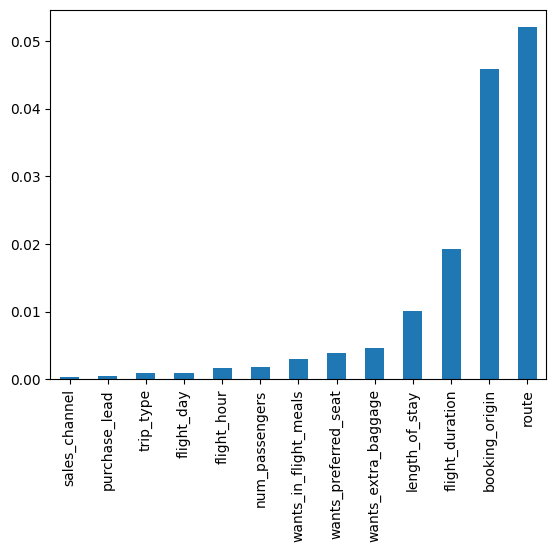

In [39]:
info.sort_values(ascending=True).plot.bar()
plt.savefig('./Results/features.png', bbox_inches = 'tight')

In [40]:
#Training on top 5 features
x = file[['route','booking_origin','flight_duration','length_of_stay','wants_extra_baggage']]
y = file['booking_complete']

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2, shuffle = True, random_state = 42)
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc.fit(xtrain,ytrain)
y_pred= rc.predict(xtest)
from sklearn.metrics import accuracy_score
print('Accuracy',(accuracy_score(y_pred, ytest))*100,'%')

Accuracy 83.72 %


Accuracy by Pearson Correlation is more than the accuracy from Sklearn module. We will consider Pearson Correlation's features to train our model. Now, let's look at the accuracy achieved from all the features taken into account.

In [42]:
x_ = file.drop(columns = ['booking_complete'])
y_ = file['booking_complete']

In [52]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_,y_,test_size = 0.2, shuffle = True, random_state = 42)
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc.fit(xtrain,ytrain)
y_pred= rc.predict(xtest)
from sklearn.metrics import accuracy_score
print('accuracy',(accuracy_score(y_pred, ytest))*100)

accuracy 85.61


Accuracy achieved by taking all features into account is more than selecting some features from Pearson Correlation. Let's work with GridSearchCV to find the best hyperparameters for the model. 

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid = { 'n_estimators':[100, 200,500,1000],'max_depth':[2,3,5,10,20], 'min_samples_leaf' : [5,10,50,100]}
grid = GridSearchCV(rc, param_grid,cv = 2, refit = True, verbose = 0,scoring = 'accuracy')
grid.fit(xtrain,ytrain)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 50, 100],
                         'n_estimators': [100, 200, 500, 1000]},
             scoring='accuracy')

In [46]:
grid.best_score_

0.851225

In [47]:
rfbest = grid.best_estimator_
rfbest

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=1000)

In [53]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_,y_,test_size = 0.2, shuffle = True, random_state = 42)
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=1000)
rc.fit(xtrain,ytrain)
y_pred= rc.predict(xtest)
from sklearn.metrics import accuracy_score
print('accuracy',(accuracy_score(y_pred, ytest))*100)

accuracy 85.44


Accuracy from default parameters and after Hyperparameter tuning yields same results. So ,we can work with either default values of Random Forest Classifier or by calling hyperparameter values to yield the Customer Behvaiour based on the different features. 

In [49]:
rfbest.feature_importances_

array([0.03469476, 0.01164246, 0.00065638, 0.15814278, 0.1137827 ,
       0.10717512, 0.07007129, 0.1584136 , 0.19645306, 0.02130742,
       0.01841382, 0.02054056, 0.08870605])

In [50]:
im = pd.DataFrame({'variable':xtrain.columns, 'imp':rfbest.feature_importances_})

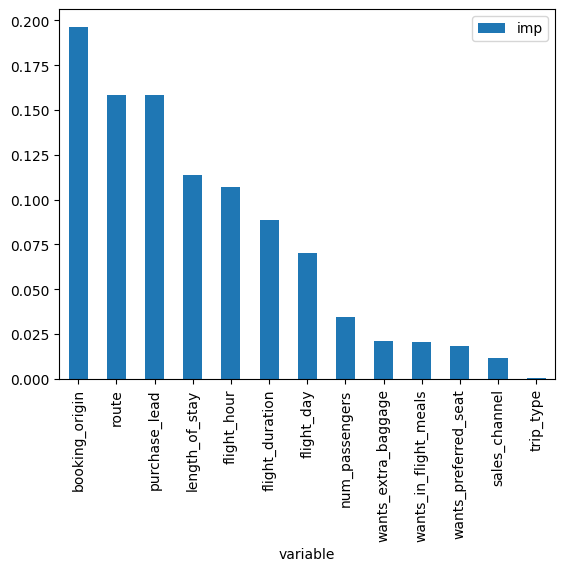

In [51]:
im.sort_values(by='imp', ascending=False).set_index('variable').plot.bar()
plt.savefig('./Results/all.png', bbox_inches='tight')

So, Analysing the results from Random Forest for all the features, we can deduce that Route, Booking Origin, Purchase Lead, Length of stay and flight hour are top 5 contributors for the customer to book a flight for their holidays.
